# Using the sub-giant age catalogue from Xiang & Rix 2022, lets find Sausage stars and check their age distribution

In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LogNorm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/subgiant-LAMOSTDR7-GaiaDR3-plusgaiadr2RVs-plusgaiaDR2ids-Xiang'
tb = fits.open(path)
data = tb[1].data 


In [3]:
# parent mask to get good quality data
mask = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ECC']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)&(d)
print(len(data[mask]))


52826


# Plot age-J$_{\phi}$ coloured by FE/H

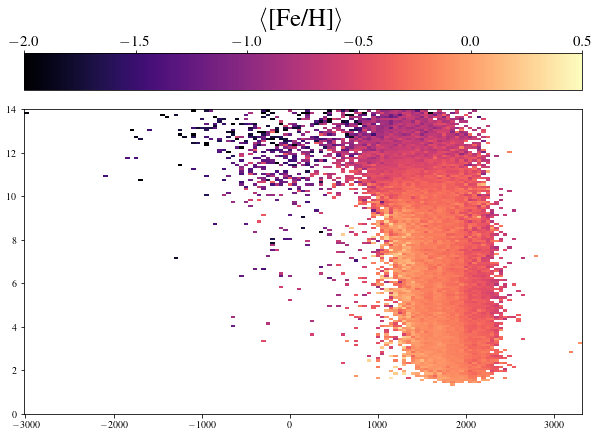

In [4]:
from scipy import stats
fig = plt.figure(figsize=(10,7))

binx = np.linspace(np.min(data['LZ'][mask]),np.max(data['LZ'][mask]),128)
biny = np.linspace(np.min(data['AGE'][mask]),np.max(data['AGE'][mask]),128)    
hist = stats.binned_statistic_2d(data['LZ'][mask],data['AGE'][mask], data['FEH'][mask], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap='magma',vmin=-2,vmax=0.5)
plt.ylim(0,14)


cbar = fig.colorbar(color,  aspect=15,orientation='horizontal',location='top')
cbar.set_label(label=r'$\langle$[Fe/H]$\rangle$',fontsize=25,labelpad=10)
cbar.ax.tick_params(labelsize=15,pad=1)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')



# select Sausage stars based on orbits

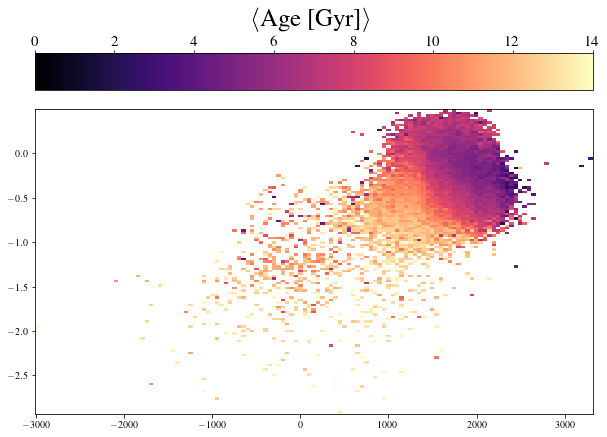

In [5]:
fig = plt.figure(figsize=(10,7))

binx = np.linspace(np.min(data['LZ'][mask]),np.max(data['LZ'][mask]),128)
biny = np.linspace(np.min(data['FEH'][mask]),np.max(data['FEH'][mask]),128)    
hist = stats.binned_statistic_2d(data['LZ'][mask],data['FEH'][mask], data['AGE'][mask], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap='magma',vmin=0,vmax=14)


cbar = fig.colorbar(color,  aspect=15,orientation='horizontal',location='top')
cbar.set_label(label=r'$\langle$Age [Gyr]$\rangle$',fontsize=25,labelpad=10)
cbar.ax.tick_params(labelsize=15,pad=1)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')



120 394


Text(0.5, 0, 'Angular Momentum')

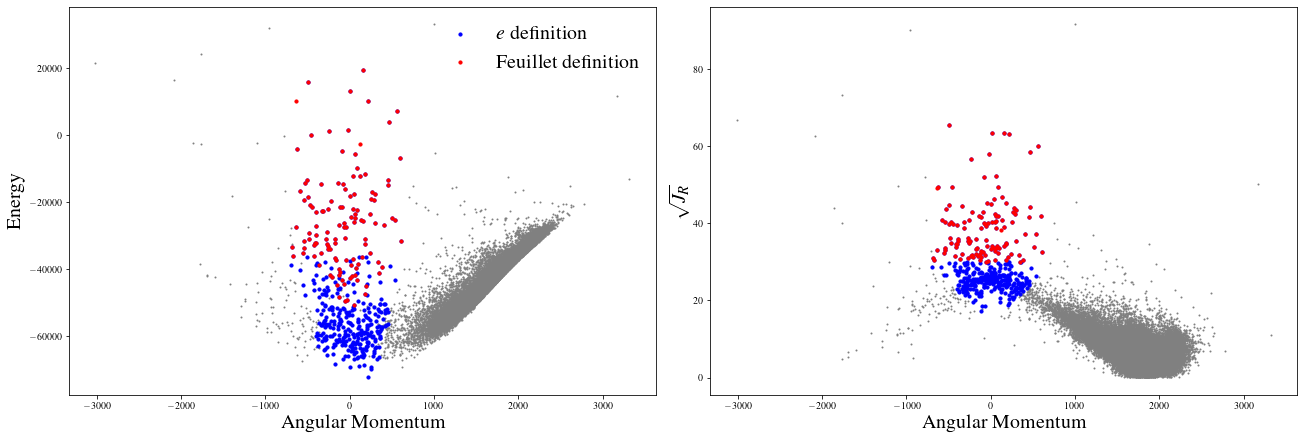

In [6]:
# Feuillet way (high purity)
mask_ges_f = (np.abs(data['LZ'])<700)&(np.sqrt(data['JR'])>30)
# ecc way (high quantity)
mask_ges_ecc = (np.abs(data['LZ'])<700) & (data["ECC"]>0.8)
print(len(data[mask&mask_ges_f]),len(data[mask&mask_ges_ecc]))

plt.figure(figsize=(18,6),facecolor='white',constrained_layout=True,rasterized=True)

# E-Lz diagram
plt.subplot(1,2,1)
plt.scatter(data['LZ'][mask],data['E'][mask],s=1,c='gray')
plt.scatter(data['LZ'][mask&mask_ges_ecc],data['E'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['LZ'][mask&mask_ges_f],data['E'][mask&mask_ges_f],s=10,c='r',label='Feuillet definition')
plt.ylabel('Energy',fontsize=20)
plt.xlabel('Angular Momentum',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,2,2)
plt.scatter(data['LZ'][mask],np.sqrt(data['JR'][mask]),s=1,c='gray')
plt.scatter(data['LZ'][mask&mask_ges_ecc],np.sqrt(data['JR'][mask&mask_ges_ecc]),s=10,c='b',label='$e$')
plt.scatter(data['LZ'][mask&mask_ges_f],np.sqrt(data['JR'][mask&mask_ges_f]),s=10,c='r',label='F')
plt.ylabel('$\sqrt{J_R}$',fontsize=20)
plt.xlabel('Angular Momentum',fontsize=20)


In [7]:
print(len(data[mask&mask_ges_f]))

120


In [8]:
# check Tom's paper
# plot young stars in all spaces (dynamics, stellar parameter space, )



In [9]:


plt.hist(data['ZMAX'][mask&mask_ges_f&~mask_a],density=True,histtype='step')
plt.hist(data['ZMAX'][mask&mask_ges_f&mask_a],density=True,histtype='step')



NameError: name 'mask_a' is not defined

Based on these distributions, I trust more the high-purity sample so we will use that

# What does the $\alpha$-Fe look like

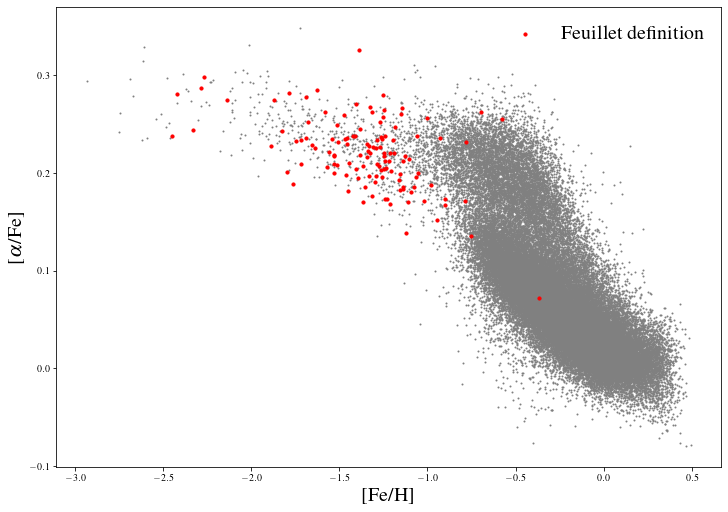

In [10]:
plt.figure(figsize=(10,7),facecolor='white',constrained_layout=True,rasterized=True)
plt.scatter(data['FEH'][mask],data['ALPHA_FE'][mask],c='gray',s=1)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f],data['ALPHA_FE'][mask&mask_ges_f],s=10,c='r',label='Feuillet definition')
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=20)
plt.legend(frameon=False,fontsize=20)


Looks like Sausage is separate, although appears quite high-alpha here... regardless, it looks like the sausage (red) so we will continue

# What are the age distributions of the samples

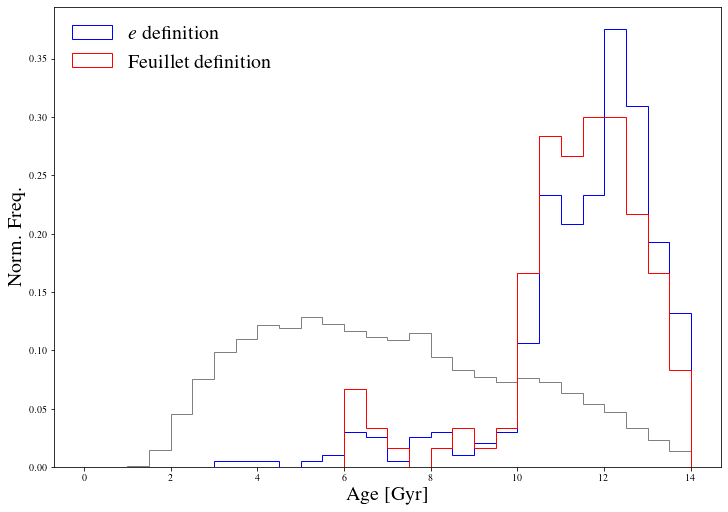

In [11]:
plt.figure(figsize=(10,7),facecolor='white',constrained_layout=True,rasterized=True)

plt.hist(data['AGE'][mask],bins=np.linspace(0,14,29),histtype='step',color='gray',density=True)
plt.hist(data['AGE'][mask&mask_ges_ecc],bins=np.linspace(0,14,29),histtype='step',color='b',label='$e$ definition',density=True)
plt.hist(data['AGE'][mask&mask_ges_f],bins=np.linspace(0,14,29),histtype='step',color='r',label='Feuillet definition',density=True)
plt.ylabel('Norm. Freq.',fontsize=20)
plt.xlabel(r'Age [Gyr]',fontsize=20)
plt.legend(frameon=False,fontsize=20)



In [12]:
#there are still young sausage stars with a SNR cut of 80 and above (used to get good Mk values from Xiang and Rix at Fe/H ~-1)




Both peak around 12 Gyr which makes sense, but are negatively skewed (tail towards young ages)

# Check to make sure they aren't in binaries by comparing the RVs of LAMOST with Gaia

(-30.0, 30.0)

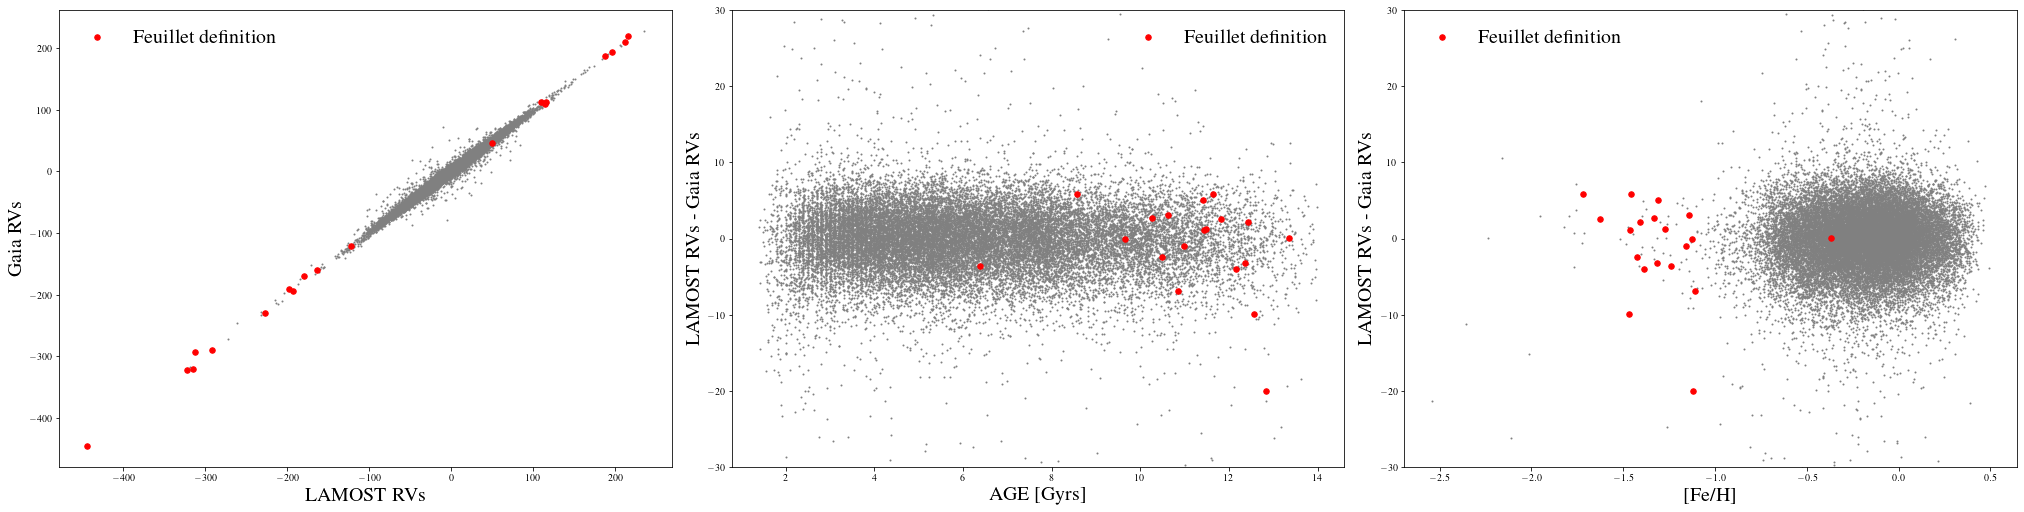

In [13]:
plt.figure(figsize=(28,7),facecolor='white',constrained_layout=True,rasterized=True)
plt.subplot(1,3,1)
plt.scatter(data['VLOS'][mask],data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_ges_f],data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('Gaia RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,3,2)
plt.scatter(data['AGE'][mask],data['VLOS'][mask]-data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['AGE'][mask&mask_ges_ecc],data['VLOS'][mask&mask_ges_ecc]-data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['AGE'][mask&mask_ges_f],data['VLOS'][mask&mask_ges_f]-data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('LAMOST RVs - Gaia RVs',fontsize=20)
plt.xlabel(r'AGE [Gyrs]',fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.ylim(-30,30)

plt.subplot(1,3,3)
plt.scatter(data['FEH'][mask],data['VLOS'][mask]-data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['VLOS'][mask&mask_ges_ecc]-data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f],data['VLOS'][mask&mask_ges_f]-data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('LAMOST RVs - Gaia RVs',fontsize=20)
plt.xlabel(r'[Fe/H]',fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.ylim(-30,30)


In [14]:
print(len(data['dr2_radial_velocity'][mask&(~np.isnan(data['dr2_radial_velocity']))]))
print(len(data['dr2_radial_velocity'][mask&(~np.isnan(data['dr2_radial_velocity']))&mask_ges_f]))

24384
19


# Do the same with APOGEE DR17

In [15]:
# LOAD THE DATA
path2 = '/Users/dhortadarrington/Documents/Master/data/XiandandRix_APOGEEDR17.fits'
tb2 = fits.open(path2)
data_apo = tb2[1].data 


In [16]:
mask_ges_apo = np.isin(data_apo['SPECID'],data['SPECID'][mask&mask_ges_f])
mask_apo = np.isin(data['SPECID'],data_apo['SPECID'])
mask_apo2 = np.isin(data_apo['SPECID'],data['SPECID'])
print(len(data_apo[mask_ges_apo]))
print(len(data[mask_apo&mask]))

6
3321


In [17]:
# LOAD THE DATA
path3 = '/Users/dhortadarrington/Documents/Master/data/XiandandRix_GALAHDR3.fits'
tb3 = fits.open(path3)
data_galah = tb3[1].data 


In [18]:
mask_ges_galah = np.isin(data_galah['SPECID'],data['SPECID'][mask&mask_ges_f])
mask_galah = np.isin(data['SPECID'],data_galah['SPECID'])
mask_galah2 = np.isin(data_galah['SPECID'],data['SPECID'][mask])
print(len(data_galah[mask_ges_galah]))
print(len(data[mask_galah&mask]))


2
1158


In [19]:
print(len(data['VLOS'][mask_galah]))
print(len(data_galah['rv_galah'][mask_galah2]))

3168
1158


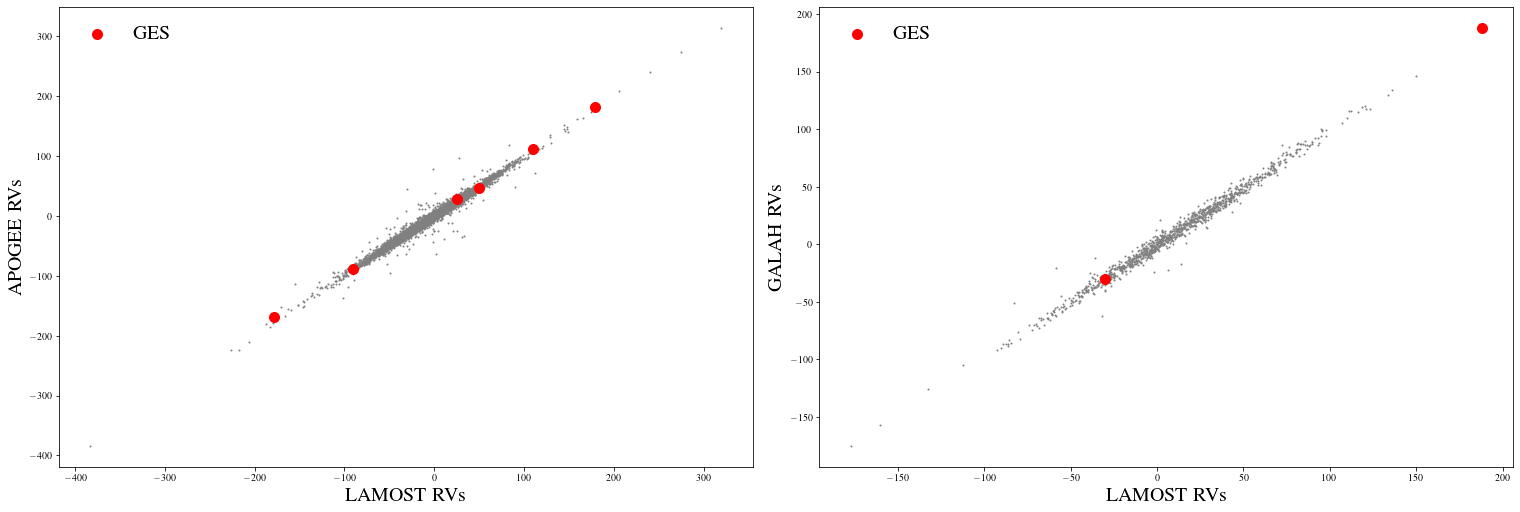

In [20]:
plt.figure(figsize=(21,7),facecolor='white',constrained_layout=True,rasterized=True)
plt.subplot(1,2,1)
plt.scatter(data['VLOS'][mask_apo],data_apo['VHELIO_AVG'][mask_apo2],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_apo&mask_ges_f],data_apo['VHELIO_AVG'][mask_ges_apo],s=100,c='r',label='GES')
plt.ylabel('APOGEE RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,2,2)
plt.scatter(data['VLOS'][mask_galah&mask],data_galah['rv_galah'][mask_galah2],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_galah&mask_ges_f],data_galah['rv_galah'][mask_ges_galah],s=100,c='r',label='GES')
plt.ylabel('GALAH RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)


# Plot abundances of stars in the parent sample below 8 Gyr (without GES stars) to compare to GES samples

For the Feulliet sample

In [21]:
# 9 stars with a SNR cut of >80
mask_teff = (data['TEFF']<6500)&(data['FEH']<-0.5)
print(len(data['FEH'][mask&mask_ges_f&mask_teff]))
# print((data['AGE'][mask&mask_ges_f&mask_a&mask_teff]))

115


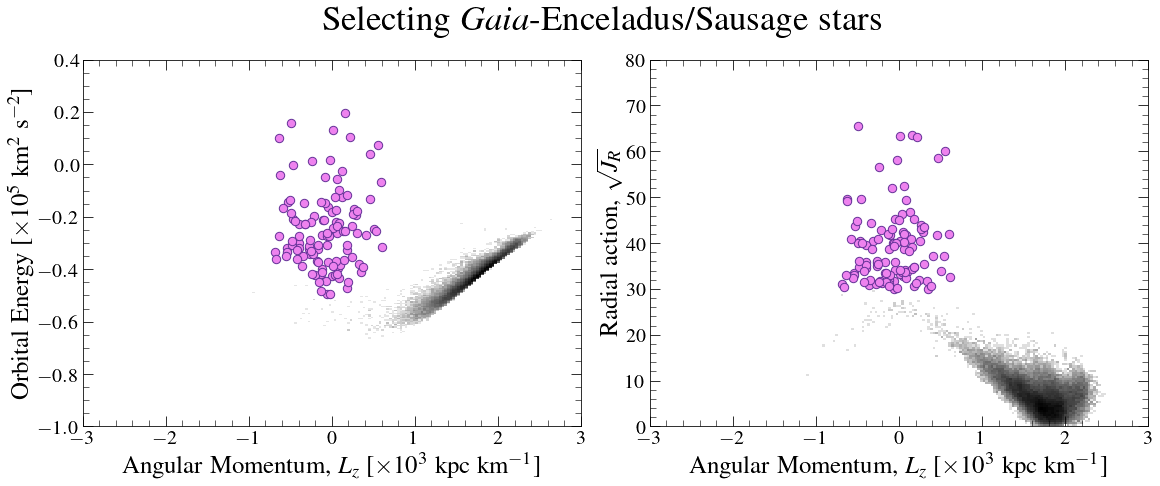

In [22]:
# Feuillet way (high purity)
mask_ges_f = (np.abs(data['LZ'])<700)&(np.sqrt(data['JR'])>30)

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
fig.suptitle(r'Selecting $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.1)

# E-Lz diagram
plt.subplot(1,2,1)
plt.hist2d(data['LZ'][mask]/1e3,data['E'][mask]/1e5,bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['LZ'][mask&mask_ges_f&mask_teff]/1e3,data['E'][mask&mask_ges_f&mask_teff]/1e5,s=70,c='violet',label='Feuillet definition',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Orbital Energy [$\times10^{5}$ km$^{2}$ s$^{-2}$]',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,3)
plt.ylim(-1,0.4)


plt.subplot(1,2,2)
plt.hist2d(data['LZ'][mask]/1e3,np.sqrt(data['JR'][mask]),bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['LZ'][mask&mask_ges_f&mask_teff]/1e3,np.sqrt(data['JR'][mask&mask_ges_f&mask_teff]),s=70,c='violet',label='F',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Radial action, $\sqrt{J_R}$',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,3)
plt.ylim(0,80)

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/dynamic-selection.pdf',dpi=200, bbox_inches = 'tight')


# Randomly sample the age values within the uncertainties to get more robust age measurements

In [23]:
ges = mask&mask_ges_f&mask_teff

In [24]:
n = 5000
ages_samp = np.zeros((len(data['AGE']),n))

for indx, i in enumerate(data['AGE']):
    ages_samp[indx] = np.random.normal(i, data['AGE_ERR'][indx], n)


In [25]:
print(np.shape(ages_samp))

(246263, 5000)


In [26]:
# new ages
ages = np.nanmean(ages_samp,axis=1)
ages_err = np.nanstd(ages_samp,axis=1)


In [27]:
# plt.scatter(ages[ges],data['AGE'][ges],s=1)

In [28]:
num_stars = []

for indx, i in enumerate(ages.T):
    
    percentile_test = np.percentile(i,[5,16,50,84,95])
    num_stars.append(len(i[i<percentile_test[0]]))
    

# Loop over x times and compute percentiles. Then figure out how many time there are outliers in the data

In [29]:
t = 100000

random_samps = np.zeros((t, len(ages[ges])))
percen_random = np.zeros((t,5))

for indx, i in enumerate(range(t)):
    random_samps[indx] = np.random.choice(ages[ges], size=115, replace=True)
    percen_random[indx] = np.percentile(ages[ges],[5,16,50,84,95],axis=0)
    

In [30]:
print(percen_random[0])
print((random_samps[0][random_samps[0]<percen_random[0][0]]))

[ 9.10109364 10.50678164 11.64077911 12.75487746 13.41791823]
[7.22326148 8.57598441 8.04971508 6.33528895 8.04971508]


In [31]:
outliers = []
outliers_ids = []

for indx, i in enumerate(random_samps):
    outliers.append(len(i[i<percen_random[indx][0]]))
    outliers_ids.append(data['AGE'][ges][i<percen_random[indx][0]])
    

In [ ]:
plt.figure(facecolor='white')
plt.hist(outliers,100)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Number of outliers per loop from random sampling', fontsize=20)

plt.show()


In [32]:
outliers = np.array(outliers)
print(len(outliers[outliers<3])/len(outliers))

0.05732


In [33]:
outliers_ids_flat = [x for xs in outliers_ids for x in xs]

(array([ 10285.,   5299.,  15585.,   5175.,  15840., 109761., 130542.,
        136352., 103936.,  67877.]),
 array([ 6.33155012,  7.08519459,  7.83883953,  8.59248447,  9.34612846,
        10.09977341, 10.85341835, 11.60706329, 12.36070824, 13.11435223,
        13.86799717]),
 <BarContainer object of 10 artists>)

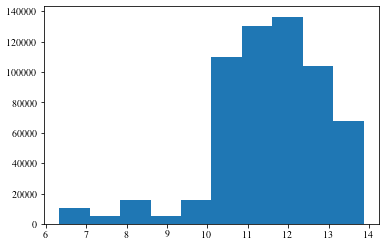

In [34]:
plt.hist(outliers_ids_flat)

In [56]:
# for m trials, sample the ages within the errors, and then see how many outliers you get
ages_samp = np.zeros((100000,len(data['AGE'][ges])))

for jndx, j in enumerate(range(100000)):
    for indx, i in enumerate(data['AGE'][ges]):
        ages_samp[jndx,indx] = np.random.normal(i, data['AGE_ERR'][ges][indx], 1)
    

In [57]:
print(np.shape(ages_samp))

(100000, 115)


In [58]:
outliers = []
outliers_ages = []

perc = np.zeros((100000,5))
for indx, i in enumerate(ages_samp):
    percen_random = np.percentile(i,[5,16,50,84,95])
    perc[indx] = percen_random
    mask__ = i<percen_random[0]
    outliers.append(len(i[mask__]))
    outliers_ages.append(i[mask__])

In [59]:
print(outliers_ages[0])
print(outliers_ages[10])
print(outliers_ages[20])

[8.3006501  8.51206424 6.58792269 7.15379969 6.93375201 7.80255253]
[8.61132561 8.73836507 6.1799302  8.57550349 7.01538633 6.21857945]
[8.60797725 6.43654238 8.34925529 7.57746621 7.88225612 7.87758083]


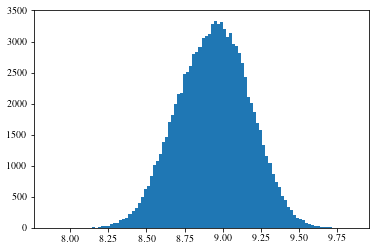

In [60]:
plt.hist(perc[:,0],100)
plt.show()


# Make all the plots with the sampled ages

In [105]:
percen_ages = np.percentile(ages[ges],[5,16,50,84,95])
print('Median: '+str(percen_ages[2]))
print('Upper: '+str(percen_ages[3]-percen_ages[2]))
print('Lower: '+str(percen_ages[2]-percen_ages[1]))
print('Std: '+str((percen_ages[3]-percen_ages[1])/2))
print('5th percentile: '+str(percen_ages[0]))


Median: 11.632232516173685
Upper: 1.1066405137595066
Lower: 1.1516210699637863
Std: 1.1291307918616464
5th percentile: 9.106144025442033


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


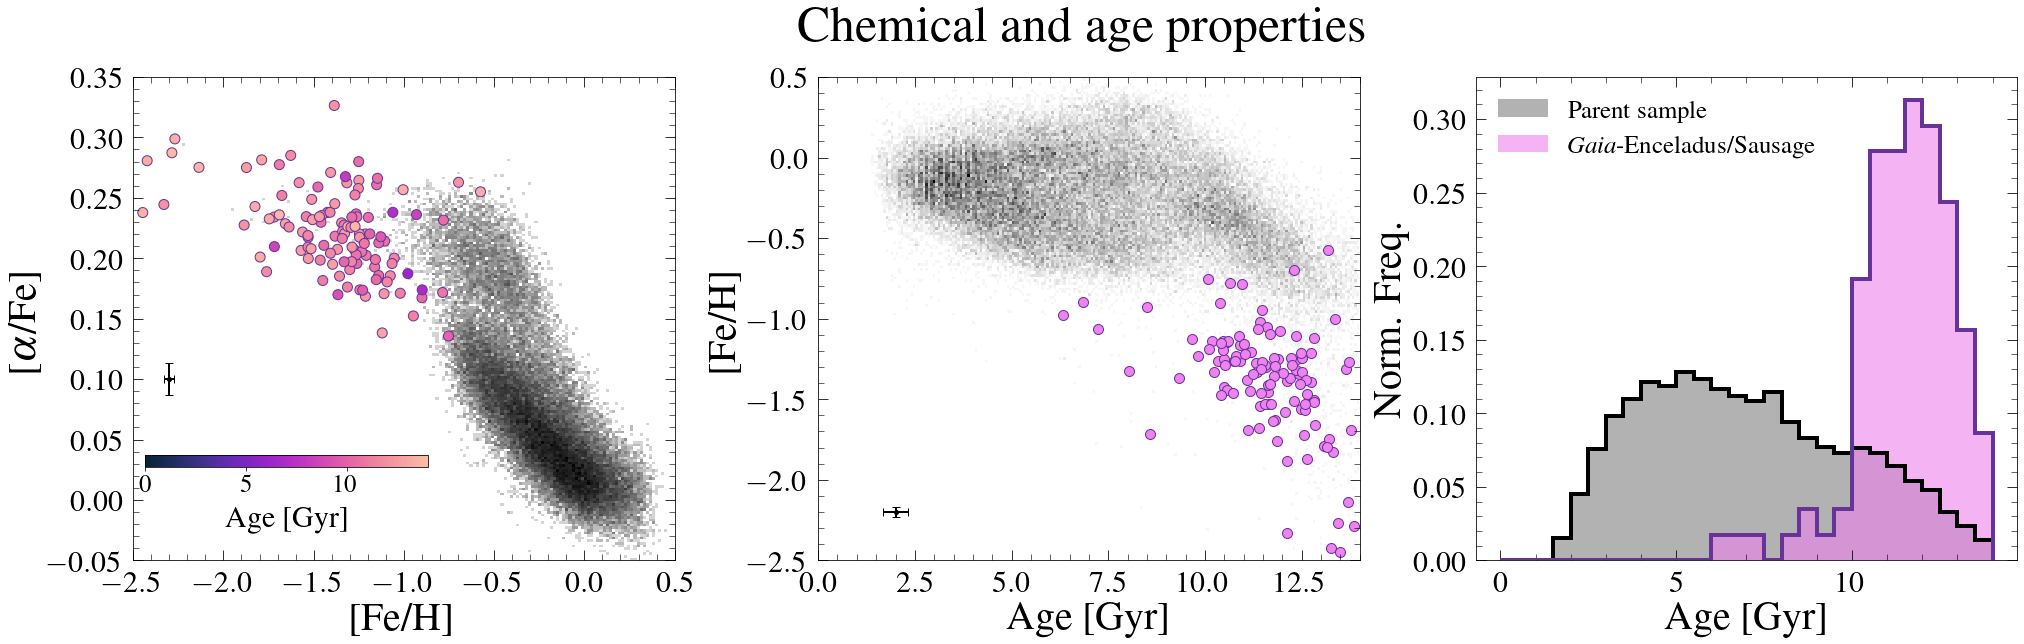

In [106]:
from matplotlib.colors import LogNorm
import cmasher as cm
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Chemical and age properties',fontsize=50,x=0.535,y=1.1)


plt.subplot(1,3,1)
plt.hist2d(data['FEH'][mask],data['ALPHA_FE'][mask],bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c=data['AGE'][mask&mask_ges_f&mask_teff],label='Feuillet definition',vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_f&mask_a],data['ALPHA_FE'][mask&mask_ges_f&mask_a],s=50,c='r',label='Age $<8$ Gyr')
plt.xlabel('[Fe/H]',fontsize=40)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(-2.3,0.1, xerr = np.nanmean(data['FEH_ERR'][mask]),yerr=np.nanmean(data['ALPHA_FE_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)


cbar_ax = fig.add_axes([0.07, 0.3, 0.14,0.02])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('bottom')
cb.ax.xaxis.set_label_position('bottom')

plt.subplot(1,3,2)
plt.hist2d(ages[mask],data['FEH'][mask],bins=200,cmap='binary',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(ages[mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_f&mask_a],data['ALPHA_FE'][mask&mask_ges_f&mask_a],s=50,c='r',label='Age $<8$ Gyr')
plt.ylabel('[Fe/H]',fontsize=40)
plt.xlabel(r'Age [Gyr]',fontsize=40)
plt.legend(frameon=False,fontsize=20)
plt.ylim(-2.5,0.5)
plt.xlim(0,14)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(2,-2.2, xerr = np.nanmean(data['AGE_ERR'][mask]),yerr=np.nanmean(data['FEH_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)



plt.subplot(1,3,3)
plt.hist(ages[mask],bins=np.linspace(0,14,29),histtype='step',lw=4,color='k',density=True)
plt.hist(ages[mask],bins=np.linspace(0,14,29),color='k',alpha=0.3,density=True, label='Parent sample')
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,29),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,29),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
plt.xlabel('Age [Gyr]',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=25)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-abundance.pdf',dpi=400, bbox_inches = 'tight')



In [87]:
m = mask&mask_ges_f&mask_teff&(ages<9)
print((data['FEH'][m]))

[-1.7176453 -0.9779139 -0.9302674 -1.0609864 -0.8986116 -1.3241386]


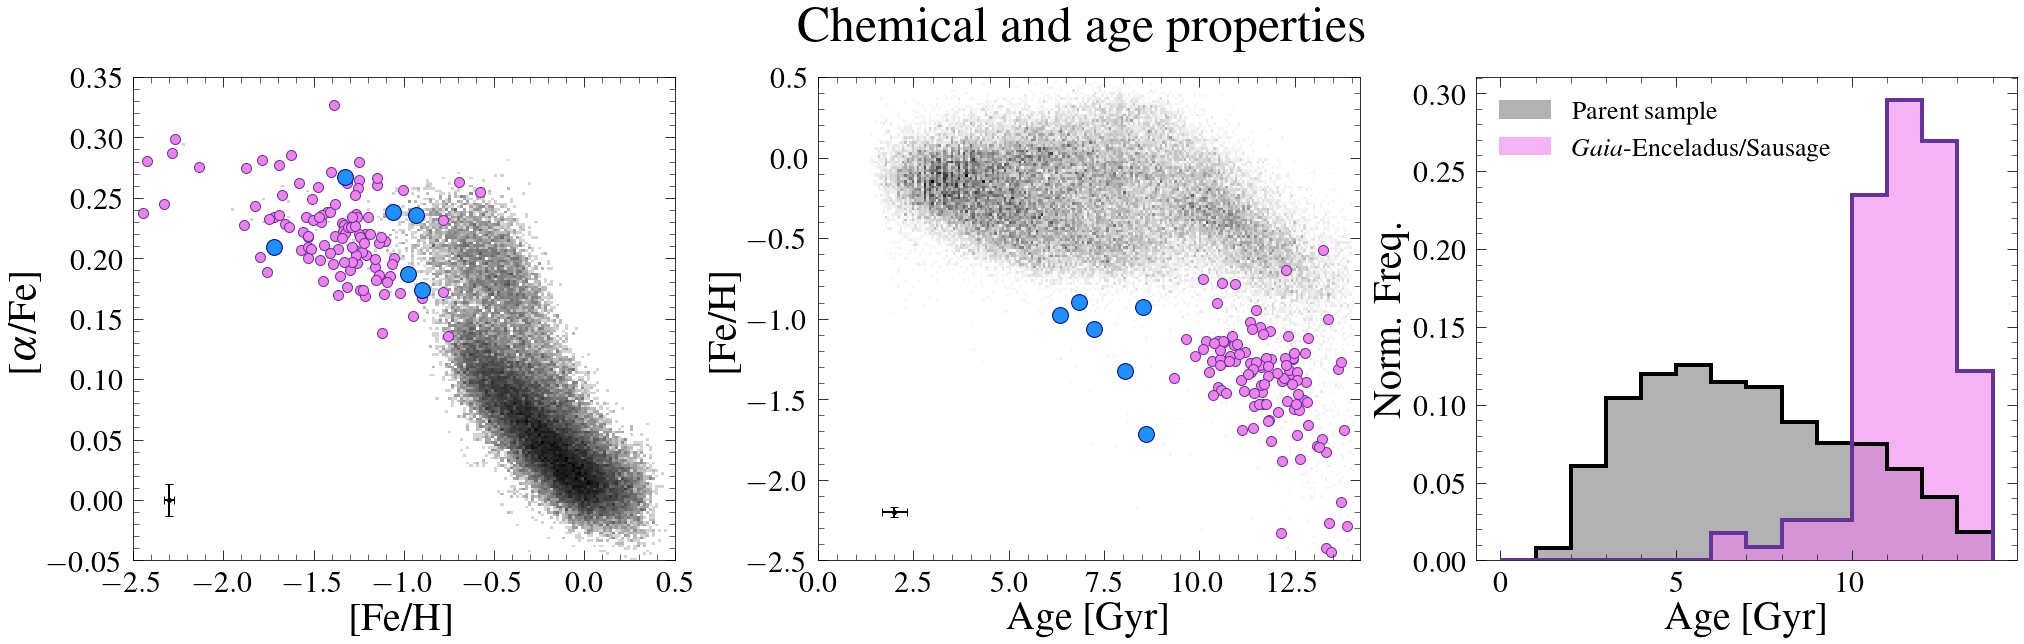

In [108]:
from matplotlib.colors import LogNorm
import cmasher as cm
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Chemical and age properties',fontsize=50,x=0.535,y=1.1)


plt.subplot(1,3,1)
plt.hist2d(data['FEH'][mask],data['ALPHA_FE'][mask],bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(data['FEH'][m],data['ALPHA_FE'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.5$ Gyr')
plt.xlabel('[Fe/H]',fontsize=40)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(-2.3,0., xerr = np.nanmean(data['FEH_ERR'][mask]),yerr=np.nanmean(data['ALPHA_FE_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

# cbar_ax = fig.add_axes([0.07, 0.3, 0.14,0.02])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('bottom')
# cb.ax.xaxis.set_label_position('bottom')

plt.subplot(1,3,2)
plt.hist2d(ages[mask],data['FEH'][mask],bins=200,cmap='binary',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['AGE'][mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(ages[m],data['FEH'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.ylabel('[Fe/H]',fontsize=40)
plt.xlabel(r'Age [Gyr]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
plt.ylim(-2.5,0.5)
plt.xlim(0,14.2)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(2,-2.2, xerr = np.nanmean(data['AGE_ERR'][mask]),yerr=np.nanmean(data['FEH_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

plt.subplot(1,3,3)
plt.hist(ages[mask],bins=np.linspace(0,14,15),histtype='step',lw=4,color='k',density=True)
plt.hist(ages[mask],bins=np.linspace(0,14,15),color='k',alpha=0.3,density=True, label='Parent sample')
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
plt.xlabel('Age [Gyr]',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=26)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-abundance.pdf',dpi=400, bbox_inches = 'tight')



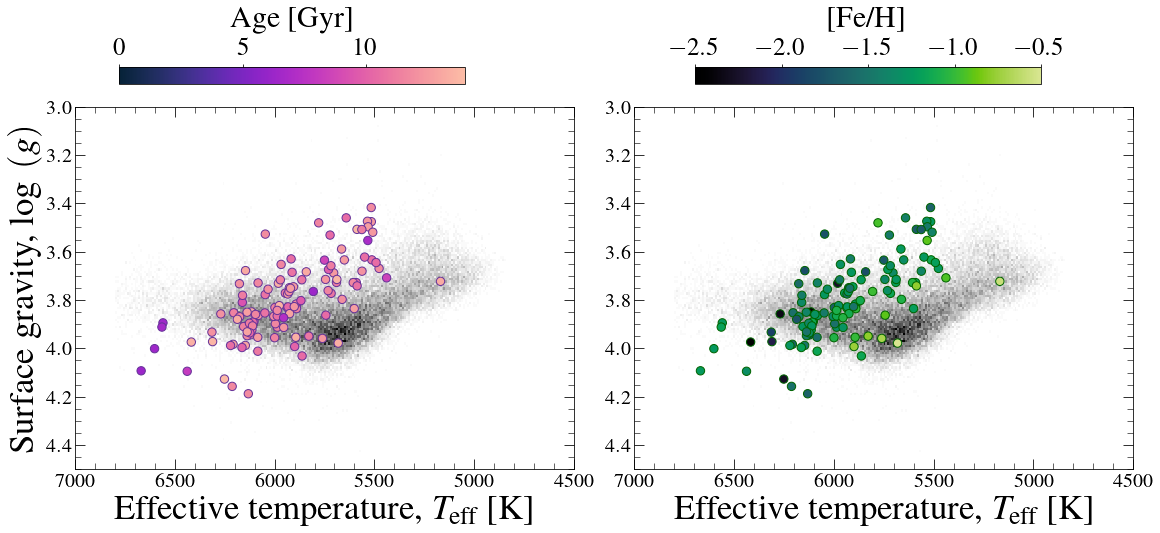

In [109]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True,rasterized=True)
# fig.suptitle(r'Kiel diagram',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask],data['LOGG'][mask],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=ages[mask&mask_ges_f],vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=35)
plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=35)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.1, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(1,2,2)
plt.hist2d(data['TEFF'][mask],data['LOGG'][mask],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['FEH'][mask&mask_ges_f],vmin=-2.5,vmax=-0.5,cmap=cm.toxic,edgecolors='darkgreen')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=35)
# plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.6, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'[Fe/H]',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/Kiel.pdf',dpi=200, bbox_inches = 'tight')


# Now you have a clean sample, look at these stars in dynamical space

In [110]:
percen = np.percentile(ages[mask&mask_ges_f&mask_teff], [5,16,50,84,95])
print(percen)

[ 9.10614403 10.48061145 11.63223252 12.73887303 13.45006719]


In [111]:
print(np.mean(ages[mask&mask_ges_f&mask_teff]))
print(np.std(ages[mask&mask_ges_f&mask_teff]))

print(np.mean(data['FEH'][mask&mask_ges_f&mask_teff]))
print(np.std(data['FEH'][mask&mask_ges_f&mask_teff]))

11.529042125682514
1.3769087179298574
-1.3690915
0.33402428


In [41]:
# pick the young stars 
m = mask&mask_ges_f&mask_teff&(ages<9)
print((data['FEH'][m]))
print((ages[m]))

[-1.7176453 -0.9779139 -0.9302674 -1.0609864 -0.8986116 -1.3241386]
[8.57598441 6.33528895 8.51035505 7.22326148 6.84771462 8.04971508]


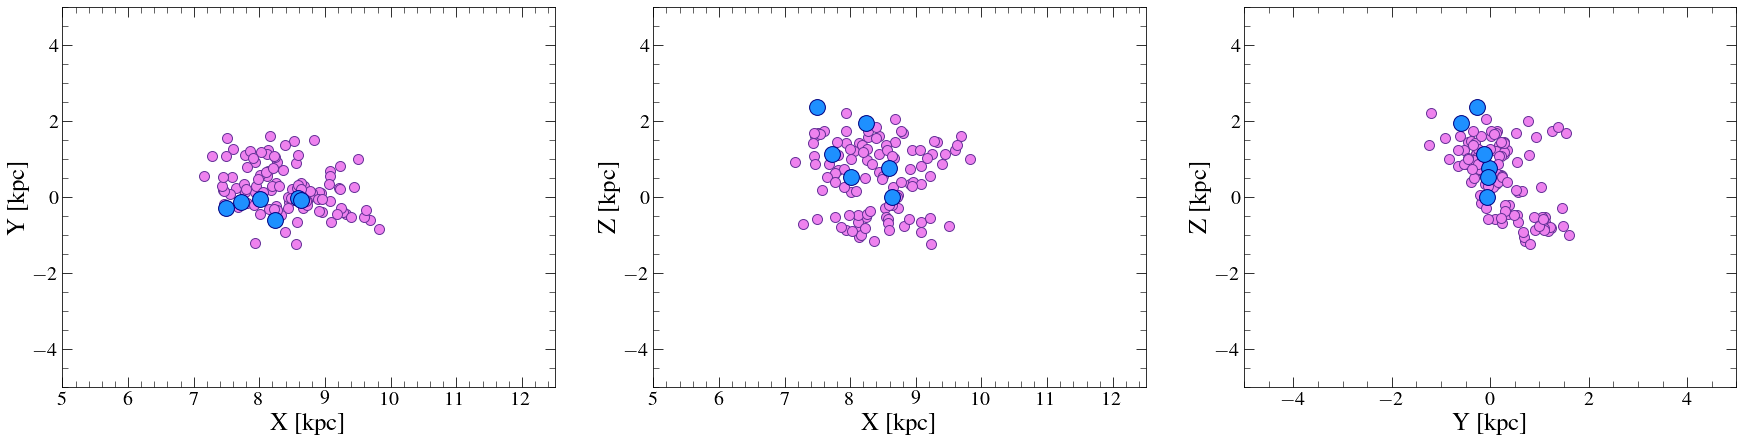

In [113]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Y'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Y'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Y [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['Y'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['Y'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('Y [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/positions.pdf',dpi=200, bbox_inches = 'tight')


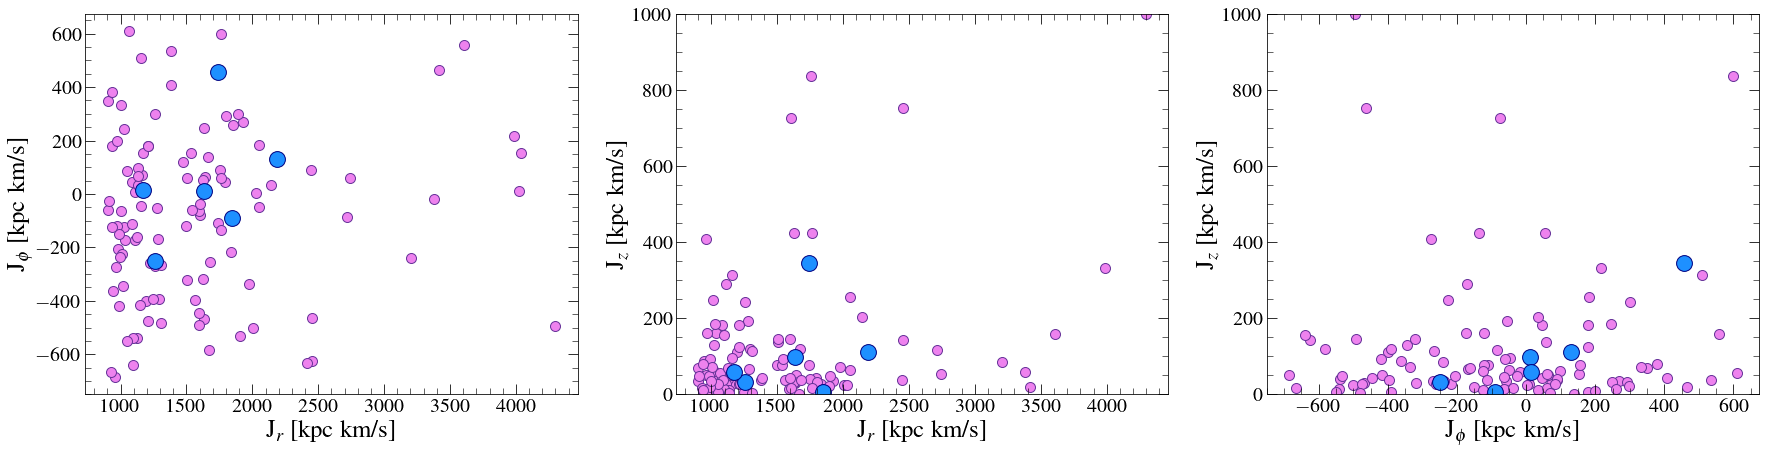

In [114]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JPHI'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JPHI'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
# plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['JPHI'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JPHI'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(-5,5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/actions.pdf',dpi=200, bbox_inches = 'tight')


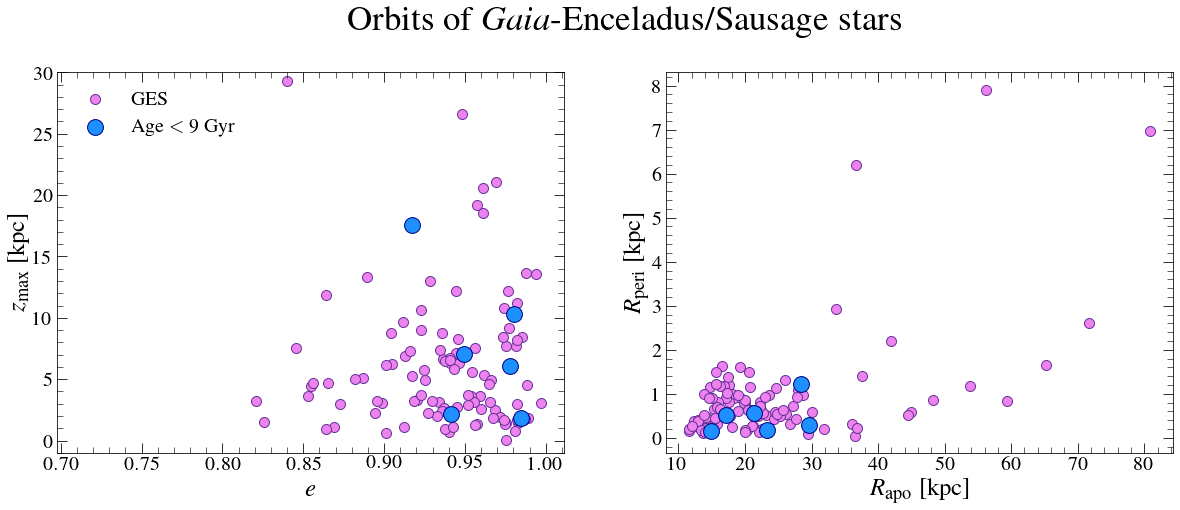

In [115]:
fig = plt.figure(figsize=(20,7),facecolor='white')

fig.suptitle(r'Orbits of $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.01)

plt.subplot(1,2,1)
plt.scatter(data['ecc'][mask&mask_ges_f&mask_teff],data['ZMAX'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['ecc'][m],data['ZMAX'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('$e$',fontsize=25)
plt.ylabel('$z_{\mathrm{max}}$ [kpc]',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
plt.ylim(-1,30)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,2,2)
plt.scatter(data['R_APO'][mask&mask_ges_f&mask_teff],data['R_PERI'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['R_APO'][m],data['R_PERI'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$R_{\mathrm{apo}}$ [kpc]',fontsize=25)
plt.ylabel('$R_{\mathrm{peri}}$ [kpc]',fontsize=25)
# plt.xlim(0,20)
# plt.ylim(-10,10)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/ecc.pdf',dpi=200, bbox_inches = 'tight')



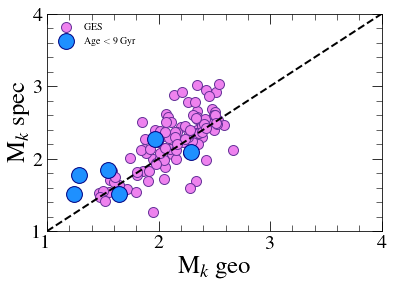

In [94]:
plt.scatter(data['MK_GEO'][mask&mask_ges_f&mask_teff],data['MK_SPEC'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MK_GEO'][m],data['MK_SPEC'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('M$_{k}$ geo',fontsize=25)
plt.ylabel('M$_{k}$ spec',fontsize=25)
plt.plot([1,4],[1,4],ls='dashed',color='k',lw=2)
plt.xlim(1,4)
plt.ylim(1,4)
plt.legend(frameon=False, fontsize=10,loc='upper left')
# plt.ylim(-1,30)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

(0.0, 30.0)

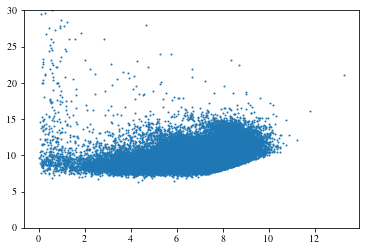

In [116]:
plt.scatter(data['R_PERI'][mask],data['R_APO'][mask],s=1)
plt.ylim(0,30)

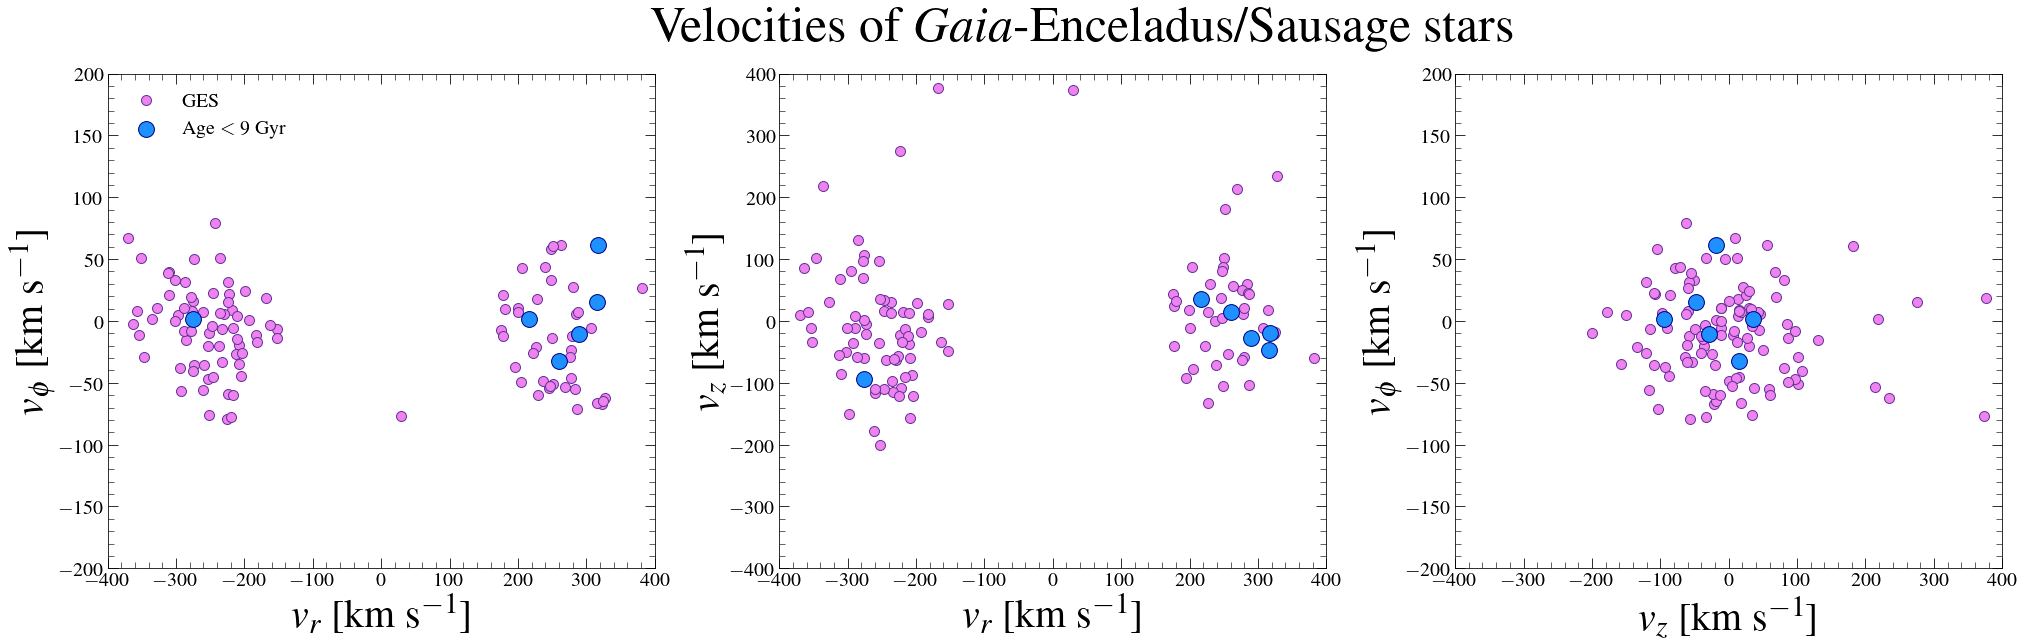

In [117]:
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Velocities of $Gaia$-Enceladus/Sausage stars',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,3,1)
plt.scatter(data['VR'][mask&mask_ges_f&mask_teff],data['VT'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['VR'][m],data['VT'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-200,200)
plt.legend(frameon=False, fontsize=20,loc='upper left')
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.scatter(data['VR'][mask&mask_ges_f&mask_teff],data['VZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['VR'][m],data['VZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['VZ'][mask&mask_ges_f&mask_teff],data['VT'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['VZ'][m],data['VT'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-200,200)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/velocities.pdf',dpi=200, bbox_inches = 'tight')


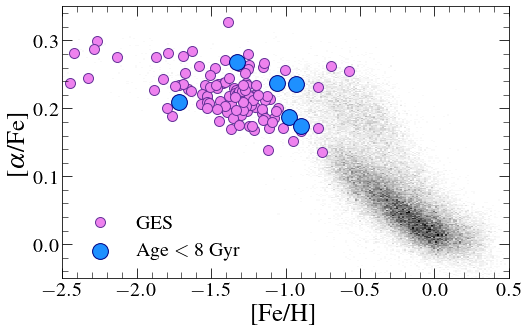

In [118]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(data['FEH'][mask],data['ALPHA_FE'][mask],bins=250,cmap='binary')
plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['FEH'][m],data['ALPHA_FE'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8$ Gyr')
plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='lower left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Check also the CMD

In [38]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']
mask_g = (data['GAIA_G']>-100)& (data['RGEO']>0)&(data['GAIA_BP']>-100)&(data['GAIA_RP']>-100)


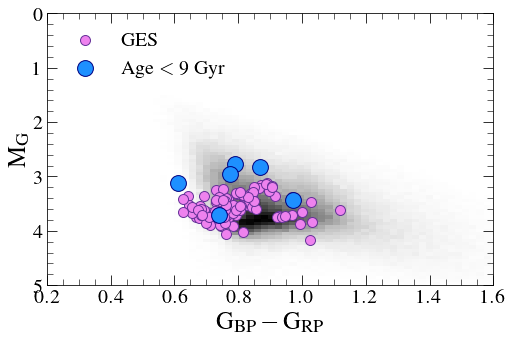

In [120]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],mags[mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],mags[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],mags[m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'G',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(5,0)
plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

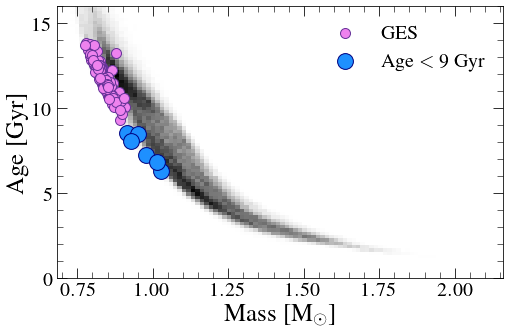

In [49]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(data['MASS'][mask_g],data['AGE'][mask_g],bins=100,cmap='binary')
plt.scatter(data['MASS'][mask&mask_ges_f&mask_teff],data['AGE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MASS'][m],data['AGE'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('Mass [M$_{\odot}$]',fontsize=25)
plt.ylabel(r'Age [Gyr]',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper right')
# plt.legend(frameon=False,fontsize=20)
# plt.xlim(0)
plt.ylim(0,16)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [35]:
def getDust(G, bp, rp, ebv, maxnit=100):
    """
    Compute the Gaia extinctions assuming relations from Babusieux.
    Author: Sergey Koposov skoposov@cmu.edu
    Args:
        G (float): Gaia G mag.
        bp (float): Gaia BP mag.
        rp (float): Gaia RP mag.
        ebv (float): E(B-V), extinction in B-V.
        maxnit (int): number of iterations
    Returns:
        Extinction in G,bp, rp
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        curbp = curbp1

    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp




In [36]:
AG, Abp, Arp = getDust(data['GAIA_G'], data['GAIA_BP'],data['GAIA_RP'],data['EBV'])


(array([8.0000e+00, 1.8322e+04, 2.6300e+04, 4.6630e+03, 2.1070e+03,
        9.3800e+02, 3.6700e+02, 9.4000e+01, 1.9000e+01, 8.0000e+00]),
 array([-0.44331148, -0.18185177,  0.07960794,  0.34106764,  0.60252738,
         0.86398709,  1.1254468 ,  1.3869065 ,  1.64836621,  1.90982592,
         2.17128563]),
 <BarContainer object of 10 artists>)

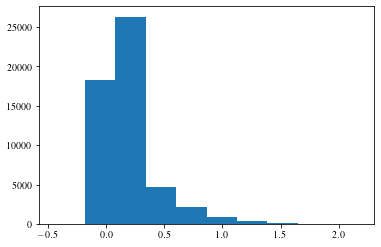

In [39]:
plt.hist(AG[mask])

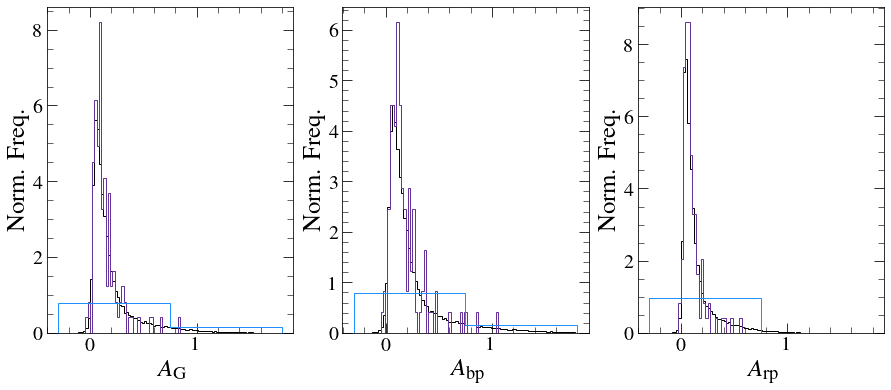

In [42]:
plt.figure(figsize=(15,6),facecolor='white')

plt.subplot(1,3,1)
plt.hist(AG[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.hist(Abp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Abp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Abp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.hist(Arp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Arp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Arp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


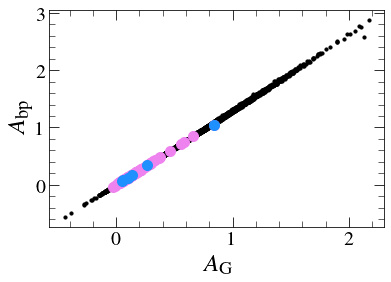

In [45]:
plt.scatter(AG[mask], Abp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Abp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Abp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

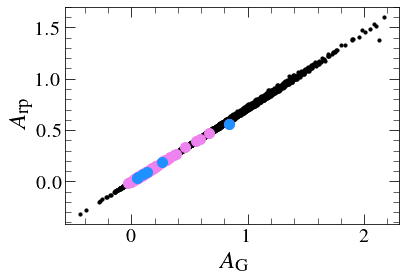

In [46]:
plt.scatter(AG[mask], Arp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Arp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Arp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Check that these young stars are not lower SNR, or have high extinction

In [121]:
print(data['SNR_G'][m])

plt.hist()

[129.18 152.21  91.37 148.01  89.41  98.75]


TypeError: hist() missing 1 required positional argument: 'x'

In [ ]:
plt.figure(figsize=(16,5),facecolor='white')

plt.subplot(1,2,1)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),histtype='step',lw=4,color='navy',density=True)
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),color='b',alpha=0.6,density=True, label=r'young stars')


plt.xlabel('SNR',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=26)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.ylim(0,0.14)

# plt.hist(1,2,2)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),histtype='step',lw=4,color='navy',density=True)
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),color='b',alpha=0.6,density=True, label=r'young stars')


# plt.xlabel('SNR',fontsize=40)
# plt.legend(frameon=False,loc='upper left',fontsize=26)
# plt.ylabel(r'Norm. Freq.',fontsize=40)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()



# Find 3 doppelgangers for each young star that are old to then compare their spectra

In [122]:
fehs_young = data['FEH'][m]
alpha_young = data['ALPHA_FE'][m]
teff_young = data['TEFF'][m]
logg_young = data['LOGG'][m]
ids_young = data['source_id_dr2']



In [124]:
data['RA'][m]

array([161.091458 , 205.3286578,  88.7193333, 207.941341 , 203.063117 ,
       181.6221158])

In [132]:
data['ALPHA_FE'][m]

array([0.20960122, 0.18726887, 0.23607482, 0.23797885, 0.17385793,
       0.26752174], dtype=float32)

In [ ]:
print(data['ALPHA_FE'][m],data['ALPHA_FE_ERR'][m],data['FEH'][m],data['FEH_ERR'][m],ages[m],ages_err[m])

In [ ]:
print(data['dr2_radial_velocity'][m])
print(data['VLOS'][m])

In [ ]:
plt.figure(figsize=(20,7),facecolor='white')

plt.subplot(1,2,1)
plt.scatter(data['ecc'][mask&mask_ges_f],data['ZMAX'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['ecc'][m],data['ZMAX'][m],s=40,c='lime')
plt.xlabel('$e$',fontsize=20)
plt.ylabel('$z_{\mathrm{max}}$ [kpc]',fontsize=20)
# plt.xlim(0,20)
# plt.ylim(-10,10)


plt.subplot(1,2,2)
plt.scatter(data['R_APO'][mask&mask_ges_f],data['R_PERI'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['R_APO'][m],data['R_PERI'][m],s=40,c='lime')
plt.xlabel('$R_{\mathrm{apo}}$ [kpc]',fontsize=20)
plt.ylabel('$R_{\mathrm{peri}}$ [kpc]',fontsize=20)
# plt.xlim(0,20)
# plt.ylim(-10,10)


In [ ]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['VR'][mask&mask_ges_f],data['VT'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VR'][m],data['VT'][m],s=40,c='lime')
plt.xlabel('$v_{r}$ [km/s]',fontsize=20)
plt.ylabel('$v_{\phi}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-200,400)


plt.subplot(1,3,2)
plt.scatter(data['VR'][mask&mask_ges_f],data['VZ'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VR'][m],data['VZ'][m],s=40,c='lime')
plt.xlabel('$v_{r}$ [km/s]',fontsize=20)
plt.ylabel('$v_{z}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-400,400)

plt.subplot(1,3,3)
plt.scatter(data['VZ'][mask&mask_ges_f],data['VT'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VZ'][m],data['VT'][m],s=40,c='lime')
plt.xlabel('$v_{z}$ [km/s]',fontsize=20)
plt.ylabel('$v_{\phi}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-200,400)


In [ ]:
print( data['GAIA_G'][m])
print( data['GAIA_BP'][m])
print( data['GAIA_RP'][m])

# Check also the CMD

In [ ]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']


In [ ]:
mag = data['GAIA_G']
bp = data['GAIA_BP']-data['GAIA_RP']
M = mag+5-5*np.log10(1./data['PARALLAX'])

plt.figure(figsize=(10,7),facecolor='white',constrained_layout=True,rasterized=True)

plt.scatter(colour[mask],M[mask],c='gray',s=1)
plt.scatter(bp[mask&mask_ges_f&mask_teff],M[mask&mask_ges_f&mask_teff],c='r',s=10)
plt.scatter(bp[m],M[m],c='lime',s=50)
plt.ylabel('G',fontsize=20)
plt.xlabel(r'bp-rp',fontsize=20)
# plt.xlim(-2.5,0.8)
# plt.ylim(-0.3,0.5)
# plt.vlines(-1,-0.3,0.5,color='r',ls='dashed',lw=2)
